Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Ivo Willemse"
COLLABORATORS = ""

---

# Introduction to python

You learn the details of python programming from [datacamp](https://campus.datacamp.com/courses/intro-to-python-for-data-science/chapter-1-python-basics?ex=1). 

Here we use python in the jupyter notebook. You also use the notebook for your assignments that you upload on github. 

In the notebook, you evaluate (or "run") the python code by pressing the `SHIFT` and `ENTER` keys simultaneously.

Play around with the Jupyter interface to get to know your way around. E.g. in the menu under "Help", you can click on "Keyboard Shortcuts". These may be useful to know. E.g. when you are in a "cell" and press `ESC` and then `m`, you change the cell from "code" to "markdown". Press `RETURN` (or `ENTER`) and you can type markdown in this cell.


## Why do we learn python?

You may have used Excel before and think that this is all you need to know to compute stuff. However, as the next tweet illustrates, Excel is not so great.

In [1]:
%%html

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Relying on Excel for important calculations is like driving drunk: no matter how carefully you do it, a wreck is likely. <a href="https://twitter.com/hashtag/reproducibility?src=hash">#reproducibility</a></p>&mdash; Philip Stark (@philipbstark) <a href="https://twitter.com/philipbstark/status/498683914592862208">August 11, 2014</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

Hence, there is value in learning a proper programming language. And python is a great language to learn!

## Bargaining model

In this lecture, we focus on an economic application programmed in python. We look at a bargaining model where two players can divide a "pie" of size $\bar x >0$. One player makes an offer $x \in [0,\bar x]$ and the other player can either accept or reject. If the other player accepts the offer, she gets $x$ and the player making the offer gets the rest of the pie $\bar x -x$.

We first consider this bargaining problem in a one shot game. One player, let's denote this player 1, makes an offer to player 2. Then we consider this game with several periods, where players 1 and 2 make offers alternatingly. 



## One period model

Recall that $\bar x$ denotes the size of the pie that players 1 and 2 can distribute. Here we work with $\bar x =10$. The offers that players can make are integer numbers between 0 and 10. Thus $x \in \{0,1,2,...,9,10\}$.

In this notebook we use the numpy library that we import:

In [2]:
import numpy as np

We define the smallest offer someone can make (0) and the highest offer ($\bar x =10$). Then we create a list (actually a numpy array) with integer numbers between 0 and 10. To understand the syntax, google on "numpy arange". 

In [4]:
min_offer = 0.0
max_offer = 10.0
offers = np.arange(min_offer,max_offer+1,1) #+1 zorgt voor 0 tot 10

---------

**Exercise**

Check what the variable `offers` looks like.

-------------

In [5]:
offers

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

We assume that players can either accept or reject an offer $x$. If a player accepts $x$, she receives a payoff equal to $x$. If she rejects $x$, she receives her outside option $x^o$. The idea is that instead of dealing with the player making her an offer, she can do "something else". This something else gives her $x^o$.

Similarly, the player making the offer: she receives $\bar x - x$ if the offer is accepted. If the offer is not accepted, this player also receives her outside option.

In the game considered here, player 1 makes the offer and player 2 decides whether to accept of reject this offer. Let the outside option of player $i$ be denoted by $x^o_i$, $i \in \{1,2\}$.

When should player 2 accept the offer $x$? She should accept if $x$ gives her at least her outside option. If $x < x^o_2$, she is better off rejecting the offer as this will give her $x_2^o$ which exceeds the offer $x$.

We define a function `accept_offer` in python which determines whether an offer is acceptable or not. This function takes two arguments: the offer that is made and the outside option of the player who decides whether or not to accept the offer. If the offer exceeds the outside option, she accepts the offer.

In this function, we define the `accept` decision as a boolean. If you forgot about this, google "python boolean". In the code below, we will use that `FALSE` in python equals 0 while `TRUE` equals 1.


In [6]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept

Hence, if player 2 receives an offer of 4 and has an outside option equal to 5, she rejects the offer:

In [7]:
accept_offer(4,5)

False

---------

**Exercise**

Multiply `accept_offer(4,5)` by `4`. What do you get?

------------

In [8]:
accept_offer(4,5)*4

0

To figure out which offer player 1 should make to player 2, we plot the profits of player 1 as a function of the offers made and the outside option of player 2. 

We plot these profits using `matplotlib`. We import this library and we tell the Jupyter notebook that the plots we make should be shown "inline" in the notebook.


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


We specify the points on the horizontal axis ("x") with the list `offers` and then give a list with coordinates of the vertical axis ("y"). The y-coordinate gives the payoff of the offfer. If the offer is rejected, player 1 gets 0 (and is probably better off with the outside option). If the offer $x$ is accepted, player 1 receives $\bar x -x$. Note that we use here that `accept_offer` equals 1 (0) when `TRUE` (`FALSE`).

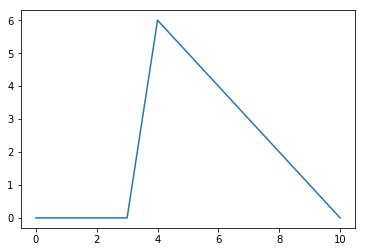

In [12]:
plt.plot(offers,[(max_offer-offer)*accept_offer(offer,4) for offer in offers])
plt.show()


Hence, the best offer that you can make is the lowest offer that is still accepted by the other player. Hence, player 1 offers player 2 the outside option $x_2^o$.

We can add text to the horizontal and vertical axes to explain what they represent (offer and profit, resp.). We can add a title to the graph. We can generare the profit for different values of the outside option by using `for outside in [6,7,8,9]`.


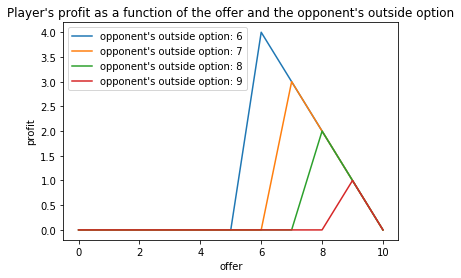

In [13]:
for outside in [6,7,8,9]:
    plt.plot(offers,[(max_offer-offer)*accept_offer(offer,outside) for offer in offers], label = "opponent's outside option: "+str(outside))


plt.xlabel('offer')
plt.ylabel('profit')
plt.title("Player's profit as a function of the offer and the opponent's outside option")
plt.legend()
plt.show()

Now we can determine the optimal offer made by player 1. From the list `profits` choose the highest number and denote this by `max_profit`. Then `max_index` captures the position in `profits` of this `max_profit`. With this `max_index` we can figure out what the offer is that leads to this highest profit: `offers[max_index]`. 

Finally, we need to check whether the max. profit that player 1 can earn --if her offer is accepted-- exceeds her outside option.

The function `make_offer` does these things and returns a list with the optimal offer ($-1$ if the optimal offer leads to a lower payoff than player 1's outside option).

In [4]:
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

Consider the case where players 1 and 2 do not have an outside option. That is, $x_1^o=x_2^o=0$. Then player 1 offers $x=0$ to player 2. Player 2 accepts this offer (outside option is not better than this). Player 1 receives a payoff equal to 10 and player 2 receives 0.

----------

**Exercise**

Check this claim using the function `make_offer`.

-----------

In [5]:
make_offer(10,0)

NameError: name 'offers' is not defined

This outcome is very asymmetric and extreme. Intuitively, this is due to the fact that only player 1 can make offers. A natural extension is to allow player 2 to make an offer as well. 

## Two period model

Consider a two period version of the bargaining model above. Player 1 can make an offer $x_1$ in the first period. If this offer is accepted by player 2, the game is finished. If player 2 rejects the offer, then we move to the second stage in which player 2 is allowed to make an offer $x_2$ to player 1. Player 1 can accept or reject this offer. If player 1 accepts, her payoff equals $x_2$ and player 2's payoff equals $\bar x - x_2$.

Payoffs are discounted with discount factor $\delta \in \langle 0,1 \rangle$. Hence, if player 1's offer in the first period is rejected, while player 2's offer in the second period is accepted, players 1 and 2's payoffs equal $\delta x_2, \delta (\bar x - x_2)$ resp.

Assume that the (exogenous) outside option for both players equals 0. 

Player 1 makes an offer $x$ to player 2 in the first period. If this offer is accepted, 2 gets $x$ and 1 receives $\bar x - x$ and the game is over.

If player 2 rejects 1's offer, the game moves to the second (and last) period. In this period, player 2 can make the offer. What offer will player 2 make?


In [6]:
delta = 0.9
outside_options = {} # dictionary of outside options as a function (key) of period
outside_options[2]= [0,0] # first element in the list is 1's outside option, 
                          # second element 2's outside option in period 2





In period 2, player 2 makes the offer:

In [7]:
offer2 = make_offer(outside_options[2][1],outside_options[2][0])
outside_options[1] = [delta*offer2[2],delta*offer2[1]]

NameError: name 'offers' is not defined

Now we move back one period, to the first period where player 1 makes the offer.

---------

**Exercise**

* what is player 2's outside option in the first period?
* use the function `make_offer` to determine the offer that player 1 makes in the first period. Which element of `outside_options[1]` is player 1's outside option and which element player 2's outside option?


In [21]:
outside_options
# outside option voor speler 2 is 9

{1: [0.0, 9.0], 2: [0, 0]}

---------

**Exercise**

What is player 1's payoff in this two period game? Explain why this is different from the one period game.

-----------

In [23]:
make_offer(outside_options[1][0],outside_options[1][1])

(9.0, 1.0, 9.0)

## Three periods

Now we extend the model above to a three period bargaining problem. We want to use the function `make_offer` to keep track of the outside options without defining a new dictionary `outside_options` (as we did above).

As above, we use backward induction to solve the game. That is, we first consider what happens in period 3 --in case the offers made in periods 1 and 2 are rejected. Once we know what will happen in period 3, we can move back to period 2 and then to period 1.

In [22]:
offers = np.arange(min_offer,max_offer+0.1,0.1)

To do this, we create a dictionary `offer`. 

----------

**Exercise** 

Explain what the following code does (e.g. what is `offer[4]`?).

----------

In [3]:
delta = 0.9
offer = {}
offer[4] = [0,0,0]
offer[3] = make_offer(delta*offer[4][2],delta*offer[4][1])


NameError: name 'make_offer' is not defined

In [2]:
offer2 = make_offer(outside_options[2][1],outside_options[2][0])
outside_options[1] = [delta*offer2[2]]

NameError: name 'make_offer' is not defined

-------

**Exercise** 

Using the logic above, define `offer[2]` and `offer[1]`.

---------

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----------

**Exercise** 

What are the payoffs for players 1 and 2 in a three period version of the bargaining model in the lecture? Explain this outcome.

-----------

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

--------

**Exercise** 

In which period will the players reach an agreement?

----------

YOUR ANSWER HERE

# Numerical Math with Python

Python can maximize and minimize functions and solve equations. These routines can be found in the scipy library. Here we look at `fsolve` to solve equations.


In [26]:
from scipy import optimize

---------

**Exercise**

Define a function `my_function` equal to $x^2+c$; this is a function of $x$ for a given value of $c$.

---------

In [29]:
def my_function(x,c):
    return x**2 + c

Now we would like to solve $x^2 + c =0$. As this is a simple equation, you can this analytically. This helps us to understand how `fsolve` works.

If you want to know more about `fsolve`, simply google "python fsolve".

For our purposes here, we call `fsolve` as `optimize.fsolve`, then we give a function and an initial value where `fsolve` starts looking for a solution. `fsolve` uses numerical techniques to find the "zero" of a function; it does not solve the equation analytically. Roughly speaking, it looks at the value $f(x)$ of a given $x$ and checks whether $f(x)$ it is above or below 0. If it is below 0, it needs to change $x$ in such a way that $f(x)$ increases. It uses the derivative $f'(x)$ to figure out whether it should increase or decrease $x$ to get to $f(x)=0$. So suppose that $f(x) < 0$ and $f'(x) >0$ then it will increase $x$ (move to the right) to a solution to $f(x) =0$.

As `my_function` is actually a function of two variables ($x$ and $c$), we define a new "anonymous" function `lambda` that is only a function of $x$ and we solve for this function to 0. Say, we start looking for a solution at $x=1$, then we type:

In [28]:
optimize.fsolve(lambda x: my_function(x,-2),+1)

array([1.41421356])

This only gives one solution? But with a quadratic equation, there are usually two solutions. 

----------

**Exercise**

In the following cell give the python command to give the other solution.

-----------

In [1]:
optimize.fsolve(lambda x: my_function(x,-2),+1)

NameError: name 'fsolve' is not defined

Now try the following cell. 

---------

**Exercise**

Explain below why you get an error message.

-----------

In [12]:
optimize.fsolve(lambda x: my_function(x,-2),0)

SyntaxError: invalid syntax (<ipython-input-12-6d53d1bb348e>, line 1)

YOUR ANSWER HERE

Now we let's consider another function, with $c = 2$ (instead of $c = -2$). Explain below why we get an error this time

In [ ]:
optimize.fsolve(lambda x: my_function(x,2),-1)

YOUR ANSWER HERE

-------

**Exercise**

Define the function $f(x) = \cos(x)+2$ in python. Hint: you may have to google to see how to do this.


---------

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

----------

**Exercise**

Plot this function for $x \in [0,7]$. 

---------

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()